In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from activation_sub_func.experimental_func import DartsFunc_simple, DartsFunc_complex 

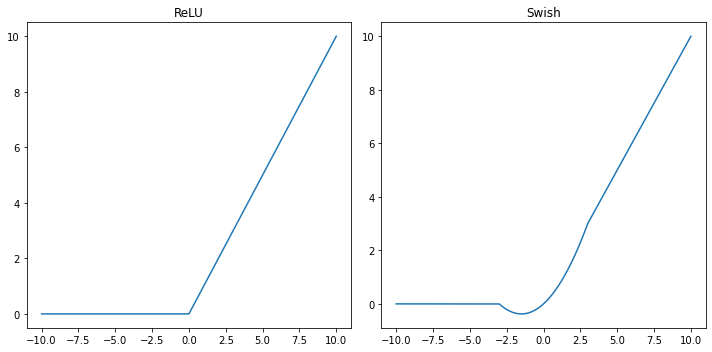

In [20]:
lin = torch.linspace(-10, 10, 1000)
swish = nn.Hardswish()
relu = nn.ReLU()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].plot(lin, relu(lin))
axes[1].plot(lin, swish(lin))

axes[0].set_title('ReLU')
axes[1].set_title('Swish')

fig.tight_layout()
fig.savefig('figures/swish_relu.png', dpi=300)
plt.show()

In [3]:
def load_json(path):
    with open(path, 'r') as f:
        result = json.load(f)
    return result

results = {
    'search': {
        'single': {
            'darts': load_json('run/cifar10/darts/1658404357.9697154_small/errors.json'),
            'gdas': load_json('run/cifar10/gdas/1658404357.9697862_small/errors.json'),
            'drnas': load_json('run/cifar10/drnas/1658404357.96965_small/errors.json')
        },
        'double': {
            'darts': load_json('run/cifar10/darts/1658404333.4517033/errors.json'),
            'gdas': load_json('run/cifar10/gdas/1658404357.9696283/errors.json'),
            'drnas': load_json('run/cifar10/drnas/1658404357.9696274/errors.json')
        }
    },
#     'eval': {
#         'single': {
#             'darts_1': '',
#             'gdas': '',
#             'drnas': ''
#         },
#         'double': { 
#             'darts': '',
#             'gdas': '',
#             'drnas': '',
#         },
#         'benchmarks': {
#             'relu': '',
#             'swish': ''
#         }
#     }
}

In [6]:
for step in results.keys():
    for approach in results[step].keys():
        for variant in results[step][approach].keys():
            runtime = results[step][approach][variant]['runtime']
            results[step][approach][variant]['runtime'] = [np.sum(runtime[:i]) for i in range(len(runtime))]

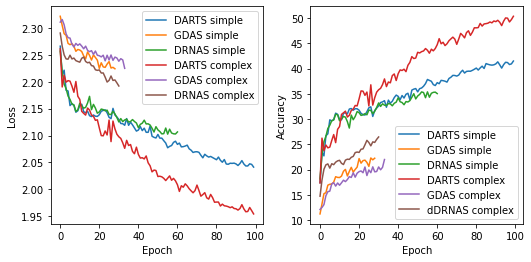

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axes[0].plot(results['search']['single']['darts']['valid_loss'], label='DARTS simple')
axes[0].plot(results['search']['single']['gdas']['valid_loss'], label='GDAS simple')
axes[0].plot(results['search']['single']['drnas']['valid_loss'], label='DRNAS simple')
axes[0].plot(results['search']['double']['darts']['valid_loss'], label='DARTS complex')
axes[0].plot(results['search']['double']['gdas']['valid_loss'], label='GDAS complex')
axes[0].plot(results['search']['double']['drnas']['valid_loss'], label='DRNAS complex')

axes[1].plot(results['search']['single']['darts']['valid_acc'], label='DARTS simple')
axes[1].plot(results['search']['single']['gdas']['valid_acc'], label='GDAS simple')
axes[1].plot(results['search']['single']['drnas']['valid_acc'], label='DRNAS simple')
axes[1].plot(results['search']['double']['darts']['valid_acc'], label='DARTS complex')
axes[1].plot(results['search']['double']['gdas']['valid_acc'], label='GDAS complex')
axes[1].plot(results['search']['double']['drnas']['valid_acc'], label='dDRNAS complex')

axes[0].legend()
axes[1].legend()
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')

fig.tight_layout()
fig.savefig('figures/simple_curves.png', dpi=300)
plt.show()

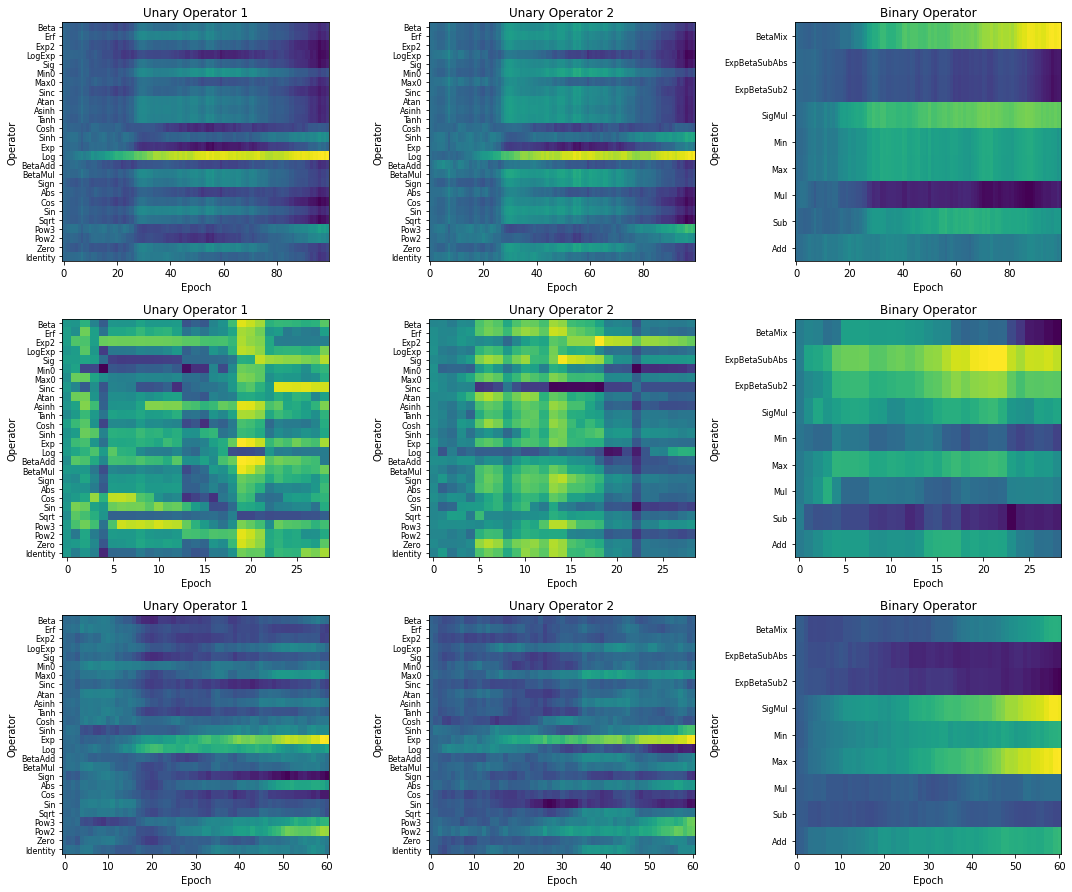

In [8]:
unary_ops = ['Identity', 'Zero', 'Pow2', 'Pow3', 'Sqrt', 'Sin', 'Cos', 'Abs', 'Sign', 'BetaMul', 'BetaAdd', 'Log', 'Exp', 'Sinh', 'Cosh', 'Tanh', 'Asinh', 'Atan', 'Sinc', 'Max0', 'Min0', 'Sig', 'LogExp', 'Exp2', 'Erf', 'Beta']
binary_ops = ['Add', 'Sub', 'Mul', 'Max', 'Min', 'SigMul', 'ExpBetaSub2', 'ExpBetaSubAbs', 'BetaMix']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12.5))

for k, key in enumerate(results['search']['single'].keys()):
    alphas = np.array([json.loads(epoch) for epoch in results['search']['single'][key]['alphas']])
    epochs, steps, num_alphas = alphas.shape
    alphas = alphas.reshape(epochs*steps, -1)
    
    for j in range(0, 3):
        im = axes[k][j].imshow(np.array([alphas[i][j] for i in range(len(alphas))])[::steps].transpose(), 
                               origin='lower', aspect='auto', interpolation='none')

        if j < 2:
            axes[k][j].set_yticks(np.arange(26))
            axes[k][j].set_yticklabels(unary_ops, fontsize=8)
        if j == 0:
            axes[k][j].set_title('Unary Operator 1')
        if j == 1:
            axes[k][j].set_title('Unary Operator 2')
        if j == 2:
            axes[k][j].set_yticks(np.arange(9))
            axes[k][j].set_yticklabels(binary_ops, fontsize=8)
            axes[k][j].set_title('Binary Operator')
        

        axes[k][j].set_xlabel('Epoch')
        axes[k][j].set_ylabel('Operator')
#         clb = plt.colorbar(im, ax=axes[k][j])
#         clb.ax.set_title(r'$\alpha$')
    
fig.tight_layout()
fig.savefig('figures/simple_alphas.png', dpi=300)
plt.show()

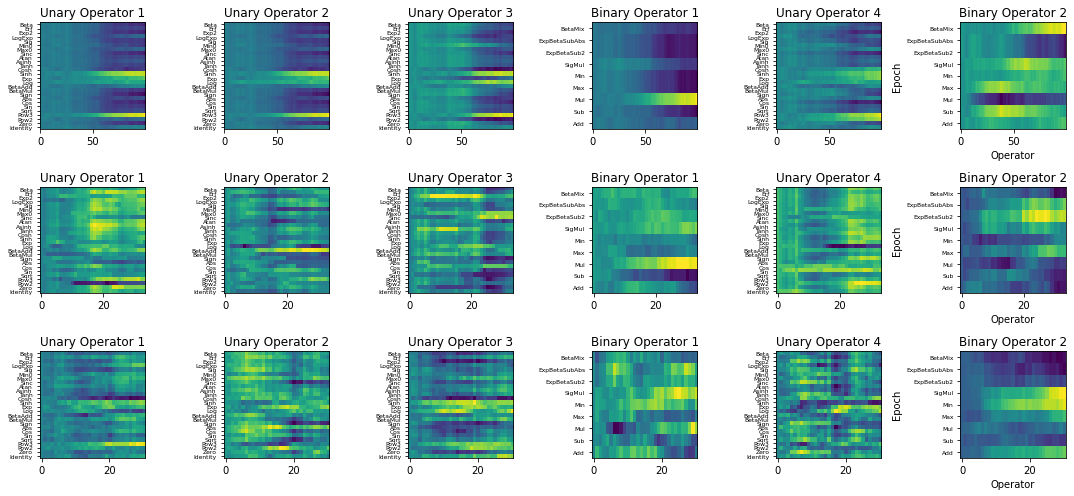

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(15, 7))

for k, key in enumerate(results['search']['double'].keys()):
    alphas = np.array([json.loads(epoch) for epoch in results['search']['double'][key]['alphas']])
    epochs, steps, num_alphas = alphas.shape
    alphas = alphas.reshape(epochs*steps, -1)
    
    for j in range(0, 6):
        im = axes[k][j].imshow(np.array([alphas[i][j] for i in range(len(alphas))])[::steps].transpose(), 
                               origin='lower', aspect='auto', interpolation='none')

        if j in (0, 1, 2, 4):
            axes[k][j].set_yticks(np.arange(26))
            axes[k][j].set_yticklabels(unary_ops, fontsize=6)
        if j in (3, 5):
            axes[k][j].set_yticks(np.arange(9))
            axes[k][j].set_yticklabels(binary_ops, fontsize=6)
        if j == 0:
            axes[k][j].set_title('Unary Operator 1')
        if j == 1:
            axes[k][j].set_title('Unary Operator 2')
        if j == 2:
            axes[k][j].set_title('Unary Operator 3')
        if j == 3:
            axes[k][j].set_title('Binary Operator 1')
        if j == 4:
            axes[k][j].set_title('Unary Operator 4')
        if j == 5:
            axes[k][j].set_title('Binary Operator 2')
            
    axes[k][j].set_xlabel('Operator')
    axes[k][j].set_ylabel('Epoch')
#     clb = plt.colorbar(im, ax=axes[k][j])
#     clb.ax.set_title(r'$\alpha$')
    
fig.tight_layout()
fig.savefig('figures/complex_alphas.png', dpi=300)
plt.show()

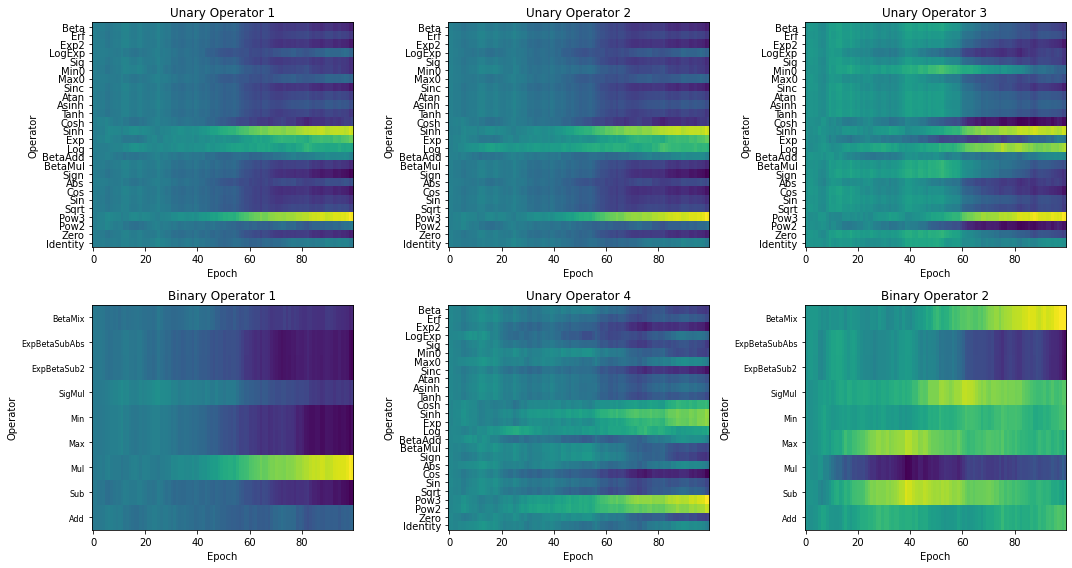

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))


alphas = np.array([json.loads(epoch) for epoch in results['search']['double']['darts']['alphas']])
epochs, steps, num_alphas = alphas.shape
alphas = alphas.reshape(epochs*steps, -1)

rc = {0 : (0, 0),
       1 : (0, 1),
       2 : (0, 2),
       3 : (1, 0),
       4 : (1, 1),
       5 : (1, 2),}

for j in range(0, 6):
    im = axes[rc[j]].imshow(np.array([alphas[i][j] for i in range(len(alphas))])[::steps].transpose(), 
                           origin='lower', aspect='auto', interpolation='none')

    if j in (0, 1, 2, 4):
        axes[rc[j]].set_yticks(np.arange(26), fontsize=8)
        axes[rc[j]].set_yticklabels(unary_ops)
    if j in (3, 5):
        axes[rc[j]].set_yticks(np.arange(9))
        axes[rc[j]].set_yticklabels(binary_ops, fontsize=8)
    if j == 0:
        axes[rc[j]].set_title('Unary Operator 1')
    if j == 1:
        axes[rc[j]].set_title('Unary Operator 2')
    if j == 2:
        axes[rc[j]].set_title('Unary Operator 3')
    if j == 3:
        axes[rc[j]].set_title('Binary Operator 1')
    if j == 4:
        axes[rc[j]].set_title('Unary Operator 4')
    if j == 5:
        axes[rc[j]].set_title('Binary Operator 2')

    axes[rc[j]].set_ylabel('Operator')
    axes[rc[j]].set_xlabel('Epoch')

fig.tight_layout()
fig.savefig('figures/darts_alphas.png', dpi=300)
plt.show()